## Download tweets from twitter for search term and do sentiment analysis on it
Using TextBlob for sentiment analysis.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import tweepy 
from tweepy import API 
from tweepy import Cursor
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import numpy as np
import pandas as pd


In [2]:
searchTerm="Ericsson"
noOfSearchTerms=200

In [3]:
consumer_key="XXX"
consumer_secret="XXX"
access_token="XXX"
access_token_secret="XXX"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth)

In [4]:
df=pd.DataFrame(columns=['Tweets','tweet_id', 'User','user_id', 'User_status_count', 'User_followers', 'User_friend_count',
                        'User_location','fav_count', 'rt_count', 'tweet_date','user_verified'])


In [5]:
def stream(data,file_name):
    i=0
    for tweet in tweepy.Cursor(api.search,q=data,count=100,lang='en').items():
        print(i,end='\r')
        df.loc[i,'Tweets']=tweet.text
        df.loc[i,'tweet_id']=tweet.id
        df.loc[i,'User']=tweet.user.name
        df.loc[i,'user_id']=tweet.user.id
        df.loc[i,'User_status_count']=tweet.user.statuses_count
        df.loc[i,'User_followers']=tweet.user.followers_count
        df.loc[i,'User_friends_count']=tweet.user.friends_count
        df.loc[i,'User_location']=tweet.user.location
        df.loc[i,'fav_count']=tweet.favorite_count
        df.loc[i,'rt_count']=tweet.retweet_count
        df.loc[i,'tweet_date']=tweet.created_at        
        df.loc[i,'user_verified']=tweet.user.verified
        df.to_csv('{}.csv'.format(file_name))
        i+=1
        if i==noOfSearchTerms:
            break
        else:
            pass
        

        

In [6]:
stream(data=searchTerm,file_name='tweets')

In [7]:
df.head()

Tweets             tweet_id  \
0  RT @MFA_China: Reports of "China may put expor...  1286252535586516992   
1  Rise in 5G sales buoys Ericsson’s quarterly pr...  1286252192102584320   
2  RT @Kevin_Jackson: So what happens when my wat...  1286252100775604224   
3  “‘The biggest single immediate risk to diversi...  1286251470652952581   
4  RT @EricssonAPAC: With the power of the #AI-ba...  1286251388335345664   

                    User              user_id User_status_count  \
0               Gohahwei  1158919762040066048             75346   
1           IAM Platform            226310002            736286   
2  Lisa HockadayJackson📲           3297160441             16325   
3            Mark Warner            621185967             31220   
4            Umar Alatas   783410619508596737             13722   

  User_followers User_friend_count       User_location fav_count rt_count  \
0            525               NaN           Australia         0      108   
1          17807               NaN           Worldwide         0        0   
2          11101               NaN                             0        1   
3           3604               NaN                             0        0   
4            526               NaN  Jakarta, Indonesia         0        4   

            tweet_date user_verified  User_friends_count  
0  2020-07-23 10:51:16         False              1486.0  
1  2020-07-23 10:49:54         False             15038.0  
2  2020-07-23 10:49:32         False              7707.0  
3  2020-07-23 10:47:02         False               910.0  
4  2020-07-23 10:46:43         False              1956.0

In [8]:
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import re

## Clean the tweet

In [9]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(https?:\/\/.*[\r\n]*)", " ", tweet).split())
    

In [10]:
def sentiment(tweet):
    analysis=TextBlob(tweet)
    
    if(analysis.sentiment.polarity>0.00):
        return '4'
    elif(analysis.sentiment.polarity==0.00):
        return '2'
    else:
        return '0'

In [11]:
df['clean_tweet']=df['Tweets'].apply(lambda x: clean_tweet(x))
df['sentiment']=df['clean_tweet'].apply(lambda x: sentiment(x))

In [12]:
df.head()

Tweets             tweet_id  \
0  RT @MFA_China: Reports of "China may put expor...  1286252535586516992   
1  Rise in 5G sales buoys Ericsson’s quarterly pr...  1286252192102584320   
2  RT @Kevin_Jackson: So what happens when my wat...  1286252100775604224   
3  “‘The biggest single immediate risk to diversi...  1286251470652952581   
4  RT @EricssonAPAC: With the power of the #AI-ba...  1286251388335345664   

                    User              user_id User_status_count  \
0               Gohahwei  1158919762040066048             75346   
1           IAM Platform            226310002            736286   
2  Lisa HockadayJackson📲           3297160441             16325   
3            Mark Warner            621185967             31220   
4            Umar Alatas   783410619508596737             13722   

  User_followers User_friend_count       User_location fav_count rt_count  \
0            525               NaN           Australia         0      108   
1          17807               NaN           Worldwide         0        0   
2          11101               NaN                             0        1   
3           3604               NaN                             0        0   
4            526               NaN  Jakarta, Indonesia         0        4   

            tweet_date user_verified  User_friends_count  \
0  2020-07-23 10:51:16         False              1486.0   
1  2020-07-23 10:49:54         False             15038.0   
2  2020-07-23 10:49:32         False              7707.0   
3  2020-07-23 10:47:02         False               910.0   
4  2020-07-23 10:46:43         False              1956.0   

                                         clean_tweet sentiment  
0  RT China Reports of China may put export contr...         2  
1  Rise in 5G sales buoys Ericsson s quarterly pr...         4  
2  RT Jackson So what happens when my watch gets ...         0  
3  The biggest single immediate risk to diversifi...         0  
4  RT With the power of the AI backed Ericsson Op...         2

## Data visualization

In [35]:
all_tweets=' '.join(tweet for tweet in df['clean_tweet'])
more_stopwords={"RT"}

In [36]:
wordcloud=WordCloud(stopwords=STOPWORDS.union(more_stopwords)).generate(all_tweets)

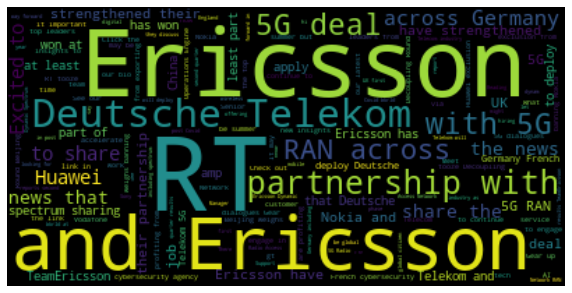

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

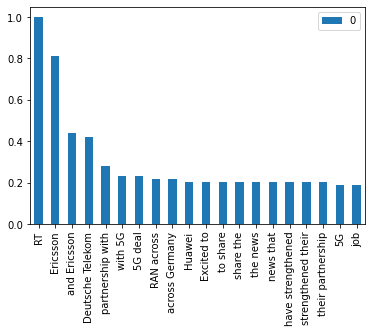

In [16]:
df_freq=pd.DataFrame.from_dict(data=wordcloud.words_,orient='index')
df_freq=df_freq.head(20)

df_freq.plot.bar()

## Sentiment analysis using TextBlob

In [17]:
def percentage(fraction,whole):
    return 100* float(fraction)/float(whole)

positive=0
neutral=0
negative=0
polarity=0
positive_percent=0
negative_percent=0
neutral_percent=0

for tweet in df['clean_tweet']:
    analysis=TextBlob(tweet)
    polarity+=analysis.sentiment.polarity
    #if(analysis.sentiment.polarity<0.00):
    #   print(tweet,"\n")
    if(analysis.sentiment.polarity==0.00):
        neutral+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1

In [18]:
positive_percent=percentage(positive,noOfSearchTerms)
negative_percent=percentage(negative,noOfSearchTerms)
neutral_percent=percentage(neutral,noOfSearchTerms)

In [19]:
positive_percent=format(positive_percent,'.2f')
negative_percent=format(negative_percent,'.2f')
neutral_percent=format(neutral_percent,'.2f')

In [20]:
labels=['Positive:['+str(positive_percent)+'%]','Negative:['+str(negative_percent)+'%]','Neutral:['+str(neutral_percent)+'%]']

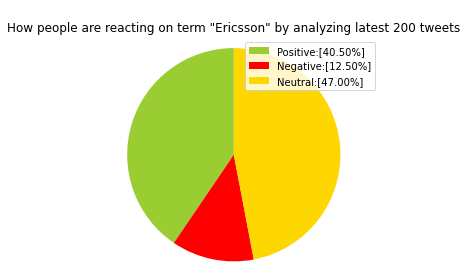

In [21]:
import matplotlib.pyplot as plt
sizes=(positive_percent,negative_percent,neutral_percent)
colors=('yellowgreen','red','gold')
patches,text=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels=labels,loc="best")
plt.title("\nHow people are reacting on term \""+searchTerm+"\" by analyzing latest "+str(noOfSearchTerms)+" tweets")
plt.axis("equal")
plt.tight_layout()
plt.show()

## Results
The above pie chart shows how the tweets are responding on the search term. 